<a href="https://colab.research.google.com/github/kaushikgowda73/intrnl-exm/blob/main/Boston_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='linear'))

In [6]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
11/11 [==============================] - 1s 25ms/step - loss: 546.4177 - mae: 21.5591 - val_loss: 575.9913 - val_mae: 22.2754
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 478.7250 - mae: 20.0103 - val_loss: 501.8010 - val_mae: 20.6028
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 400.7009 - mae: 18.0329 - val_loss: 407.0876 - val_mae: 18.2909
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 301.9502 - mae: 15.2825 - val_loss: 291.1067 - val_mae: 14.9769
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 193.5711 - mae: 11.7061 - val_loss: 177.5504 - val_mae: 10.8666
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 109.1737 - mae: 8.2567 - val_loss: 106.4814 - val_mae: 7.9060
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 69.4983 - mae: 6.3051 - val_loss: 78.0720 - val_mae: 6.6617
Epoch 8/100
11/11 [===========================

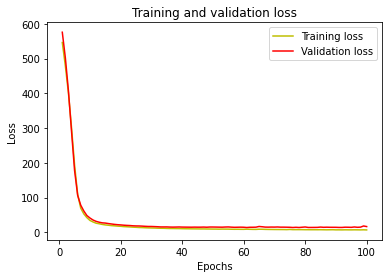

In [8]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 4ms/step - loss: 27.0065 - mae: 3.2133
Mean squared error from neural net:  27.006513595581055
Mean absolute error from neural net:  3.213263511657715


In [10]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 91ms/step
Predicted values are:  [[ 7.4409027]
 [17.945766 ]
 [20.68012  ]
 [34.473637 ]
 [24.99035  ]]
Real values are:  [ 7.2 18.8 19.  27.  22.2]


In [11]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  23.195599256423
Mean absolute error from linear regression:  3.464185812406719
